<h1>8. Deep Learning für Zeitreihen</h1>
<h4>Session 8 (Freitag 15:15 – 17:00)</h4>
<br>
8.1 Recurrent Neural Networks (RNN)<br>
8.2 LSTMs, Bsp: Stromverbrauch vorhersagen mit mehreren Inputmerkmalen<br>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
airline = pd.read_csv('AirPassengers.csv',index_col='Month', parse_dates=True)
airline.index.freq='MS'
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


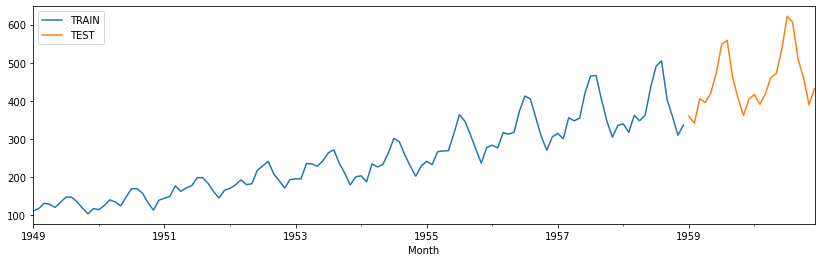

In [41]:
train_airline = airline[:120]
test_airline = airline[120:]
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(14,4));

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(train_airline)
scaled_train = scaler.transform(train_airline)
scaled_test = scaler.transform(test_airline)

In [44]:
scaled_train[:10]

array([[0.01995012],
       [0.03491272],
       [0.06982544],
       [0.06234414],
       [0.04239401],
       [0.07730673],
       [0.10972569],
       [0.10972569],
       [0.0798005 ],
       [0.03740648]])

In [45]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [46]:
generator[0]

(array([[[0.01995012],
         [0.03491272],
         [0.06982544]]]),
 array([[0.06234414]]))

In [48]:
X,y = generator[0]
print(f'Zu diesem Input: \n{X.flatten()}')
print(f'Sage mir das voraus: \n {y}')

Zu diesem Input: 
[0.01995012 0.03491272 0.06982544]
Sage mir das voraus: 
 [[0.06234414]]


In [49]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [50]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [52]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
108/108 [==============================] - 4s 8ms/step - loss: 0.0346
Epoch 2/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0131
Epoch 3/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0132
Epoch 4/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0125
Epoch 5/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0115
Epoch 6/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0106
Epoch 7/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0060
Epoch 8/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0082
Epoch 9/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 10/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0041
Epoch 11/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0087
Epoch 12/50
108/108 [==============================] - 1s 8ms/step - loss: 0.0069
Epoch 13/50
108/108 [====

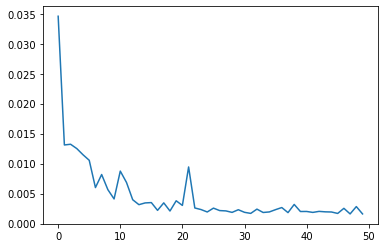

In [53]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [54]:
last_train_batch = scaled_train[-12:]

In [55]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [56]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 563ms/step


array([[0.6081389]], dtype=float32)

In [57]:
scaled_test[0]

array([0.63840399])

In [58]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_airline)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 40ms/step


In [59]:
test_predictions

[array([0.6081389], dtype=float32),
 array([0.6285301], dtype=float32),
 array([0.6694858], dtype=float32),
 array([0.6938268], dtype=float32),
 array([0.7788264], dtype=float32),
 array([0.9373495], dtype=float32),
 array([1.0792185], dtype=float32),
 array([1.0777397], dtype=float32),
 array([0.90237087], dtype=float32),
 array([0.72807676], dtype=float32),
 array([0.63614017], dtype=float32),
 array([0.62976485], dtype=float32),
 array([0.6381314], dtype=float32),
 array([0.6584439], dtype=float32),
 array([0.6900184], dtype=float32),
 array([0.7419208], dtype=float32),
 array([0.85476947], dtype=float32),
 array([1.0189888], dtype=float32),
 array([1.1496593], dtype=float32),
 array([1.1551855], dtype=float32),
 array([1.0183586], dtype=float32),
 array([0.8345073], dtype=float32),
 array([0.71936756], dtype=float32),
 array([0.67324185], dtype=float32)]

In [60]:
test_airline.head()

,#Passengers
Month,
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396
1959-05-01,420


In [61]:
true_predictions = scaler.inverse_transform(test_predictions)

In [62]:
test_airline['Predictions'] = true_predictions

C:\Users\sinaa\AppData\Local\Temp\ipykernel_21564\1118789022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_airline['Predictions'] = true_predictions


In [63]:
test_airline.head()

,#Passengers,Predictions
Month,,
1959-01-01,360,347.863706
1959-02-01,342,356.040564
1959-03-01,406,372.463809
1959-04-01,396,382.224545
1959-05-01,420,416.309393


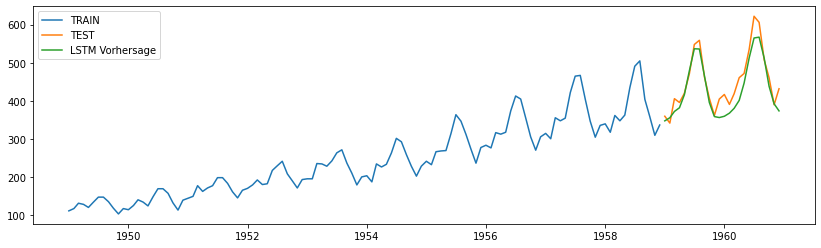

In [64]:
fig = plt.figure(figsize = (14,4))
ax = fig.add_subplot(111)

ax.plot(train_airline.index,train_airline['#Passengers'], label = "TRAIN")
ax.plot(test_airline.index,test_airline['#Passengers'], label = "TEST")
ax.plot(test_airline.index,test_airline['Predictions'], label = "LSTM Vorhersage")
plt.legend(loc='upper left');
plt.show()

In [65]:
errors = [['Mean Absolute Error', mean_absolute_error(test_airline['#Passengers'],test_airline['Predictions'])], ['Mean Squared Error', mean_squared_error(test_airline['#Passengers'],test_airline['Predictions'])]] 
errors = pd.DataFrame(errors, columns = ['Art des Fehlers','LSTM Vorhersage']) 
errors.set_index('Art des Fehlers', inplace=True) 
errors = round(errors, 2)
errors 

,LSTM Vorhersage
Art des Fehlers,
Mean Absolute Error,24.70
Mean Squared Error,976.89


<div class="alert alert-info">
- Versuche dich an einem LSTM Modell für unsere Stromlastvorhersage im Mai 2012<br>
- Orientiere dich dabei an diesem Beispiel<br>
- Wie schneidet die (einfach) LSTM Vorhersage im Vergleich zu unseren bisherigen Modellen (SARIMA, Prophet) in diesem Anwendungsfall ab?
</div>